In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [58]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')

y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

In [163]:
std_num = ColumnTransformer(transformers=[('std_num', StandardScaler(), num_vars)],
                            remainder='passthrough')

In [164]:
lasso_pipe = Pipeline([
    ('std_num', std_num),
    ('lasso_log', LogisticRegression(penalty='l1', solver='liblinear', C=1, fit_intercept=True, class_weight='balanced'))
])

In [144]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [168]:
lasso_grid = np.linspace(start=0.0001, stop=100, num=100)

lassoCV = GridSearchCV(estimator=lasso_pipe,
                       param_grid={'lasso_log__C': lasso_grid},
                       scoring="accuracy",
                       cv=KFold(n_splits=10, shuffle=True, random_state=42))

lassoCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_num',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'time_spent',
                                                                          'banner_views',
                                                                          'banner_views_old',
                                                                          'days_elapsed_old',
                                                                          'X4'])])),
                                       ('lasso_log',
                                        LogisticRegression(C=1,
                                                           class_weight='balanced',
                                                           penalty='l1',
                                                           solver='l...
       7.07071e+01, 7.17172e+01, 7.27273e+01, 7.37374e+01, 7.47475e+01,
       7.57576e+01, 7.67677e+01, 7.77778e+01, 7.87879e+01, 7.97980e+01,
       8.08081e+01, 8.18182e+01, 8.28283e+01, 8.38384e+01, 8.48485e+01,
       8.58586e+01, 8.68687e+01, 8.78788e+01, 8.88889e+01, 8.98990e+01,
       9.09091e+01, 9.19192e+01, 9.29293e+01, 9.39394e+01, 9.49495e+01,
       9.59596e+01, 9.69697e+01, 9.79798e+01, 9.89899e+01, 1.00000e+02])},
             scoring='accuracy')

In [169]:
pd.DataFrame(lassoCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019527,0.003258,0.007823,0.002616,0.0001,{'lasso_log__C': 0.0001},0.566188,0.607656,0.593301,0.590112,0.537480,0.590112,0.602236,0.581470,0.584665,0.579872,0.583309,0.018852,100
1,0.110437,0.041954,0.007027,0.001036,1.0102,{'lasso_log__C': 1.0102},0.819777,0.811802,0.835726,0.835726,0.816587,0.818182,0.801917,0.824281,0.817891,0.816294,0.819818,0.009695,98
2,0.199645,0.058192,0.006714,0.001597,2.0203,{'lasso_log__C': 2.0203},0.819777,0.811802,0.835726,0.835726,0.816587,0.816587,0.805112,0.821086,0.817891,0.814696,0.819499,0.009154,99
3,0.238127,0.077004,0.005788,0.000721,3.0304,{'lasso_log__C': 3.0304},0.819777,0.811802,0.835726,0.835726,0.816587,0.816587,0.805112,0.821086,0.821086,0.814696,0.819818,0.009149,97
4,0.293054,0.103198,0.005770,0.001415,4.0405,{'lasso_log__C': 4.0405},0.818182,0.811802,0.835726,0.835726,0.818182,0.816587,0.805112,0.821086,0.822684,0.814696,0.819978,0.009155,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.104991,0.153815,0.006913,0.000957,95.9596,{'lasso_log__C': 95.95960000000001},0.818182,0.811802,0.835726,0.835726,0.816587,0.816587,0.805112,0.821086,0.822684,0.814696,0.819819,0.009199,87
96,0.078653,0.093633,0.007035,0.001225,96.9697,{'lasso_log__C': 96.9697},0.818182,0.811802,0.835726,0.835726,0.818182,0.816587,0.805112,0.821086,0.822684,0.814696,0.819978,0.009155,2
97,0.087023,0.084382,0.007427,0.000898,97.9798,{'lasso_log__C': 97.9798},0.818182,0.811802,0.835726,0.835726,0.816587,0.816587,0.805112,0.821086,0.822684,0.814696,0.819819,0.009199,87
98,0.147619,0.156565,0.006521,0.001304,98.9899,{'lasso_log__C': 98.9899},0.818182,0.811802,0.835726,0.835726,0.816587,0.816587,0.805112,0.821086,0.822684,0.814696,0.819819,0.009199,87


In [170]:
# Choose best model that minimizes cv_err
mean_scores = lassoCV.cv_results_["mean_test_score"]
std_scores = lassoCV.cv_results_["std_test_score"] / np.sqrt(lassoCV.n_splits_)
C_values = lassoCV.cv_results_["param_lasso_log__C"].data

best_index = np.argmax(mean_scores)
max_C_lasso = C_values[best_index]
threshold_lasso = mean_scores[best_index] + std_scores[best_index]
one_std_rule_C_lasso = np.max(C_values[mean_scores <= threshold_lasso])

print("Minimum C:", max_C_lasso)
print("1-SD C:", one_std_rule_C_lasso)
print("Best score for lasso:", np.max(mean_scores))

Minimum C: 5.050599999999999
1-SD C: 100.0
Best score for lasso: 0.8201377317822584


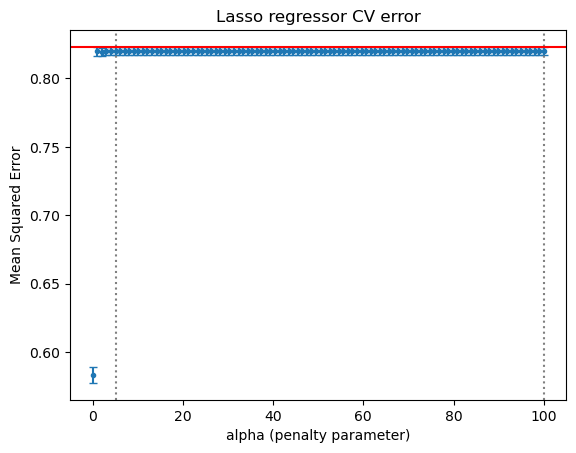

In [171]:
# plt.figure(figsize=(7,6))
plt.errorbar(x=C_values, y=mean_scores, yerr=std_scores, fmt='.', capsize=3)

plt.axvline(x=max_C_lasso, ls='dotted', color="grey")  # vertical line at the k yielding minimum CV MSE
plt.axvline(x=one_std_rule_C_lasso, ls='dotted', color="grey")   # vertical line at best k value according to 1 std err rule
plt.axhline(y=threshold_lasso, color="red")  # horizontal line line at best k value according to 1 std err rule

plt.title("Lasso regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [180]:
y_valid_pred = lassoCV.predict(X_valid)
accuracy_score(y_valid_pred, y_valid)

0.8116157855547282

In [172]:
lasso_grid = np.linspace(start=0.0001, stop=0.02, num=100)

coefs_ = []
for C in lasso_grid:
    lasso_pipe.set_params(lasso_log__C=C)
    lasso_pipe.fit(X=X_train, y=y_train)
    coefs_.append(lasso_pipe.named_steps['lasso_log'].coef_.ravel().copy())

coefs_ = np.array(coefs_)

In [225]:
pd.DataFrame(coefs_).to_excel('lasso.xlsx')

In [228]:
from matplotlib.cm import ScalarMappable
scale = ScalarMappable(cmap='tab20')
colors = scale.to_rgba(range(31))
X_train.columns[[1,2,3,4,5,6, 8, 9, 12, 19]]

Index(['education', 'device', 'day', 'month', 'time_spent', 'banner_views',
       'days_elapsed_old', 'X1', 'X4', 'outcome_old_success'],
      dtype='object')

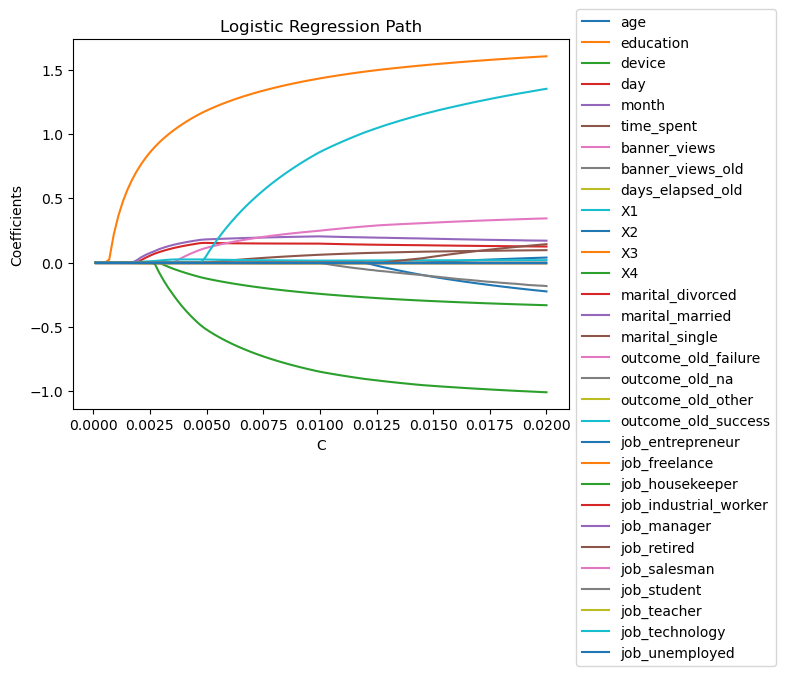

In [222]:
plt.plot(lasso_grid, coefs_, label=X_train.columns)
ymin, ymax = plt.ylim()
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.1))
plt.xlabel("C")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()